In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load dataset
data = pd.read_csv("../data/steel.csv")
X = data.drop(columns=["tensile_strength"])
y = data["tensile_strength"]

print("Dataset loaded successfully:", data.shape)


Dataset loaded successfully: (553, 10)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree -> MSE: {mse_dt:.3f}, R²: {r2_dt:.3f}")


Decision Tree -> MSE: 1514.496, R²: 0.845


In [61]:
model_knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN -> MSE: {mse_knn:.3f}, R²: {r2_knn:.3f}")


KNN -> MSE: 2294.787, R²: 0.765


In [62]:
param_grid_dt = {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
grid_dt = GridSearchCV(model_dt, param_grid_dt, cv=10, scoring="r2")
grid_dt.fit(X_train, y_train)
print("Best Decision Tree Params:", grid_dt.best_params_)

param_grid_knn = {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
grid_knn = GridSearchCV(model_knn, param_grid_knn, cv=10, scoring="r2")
grid_knn.fit(X_train_scaled, y_train)
print("Best KNN Params:", grid_knn.best_params_)


Best Decision Tree Params: {'max_depth': None, 'min_samples_split': 5}
Best KNN Params: {'n_neighbors': 7, 'weights': 'distance'}


In [63]:
# Save Decision Tree GridSearchCV results properly
results_df = pd.DataFrame(grid_dt.cv_results_)
results_df.to_csv("../data/decision_tree_cv_results.csv", index=False)

print("Saved: decision_tree_cv_results.csv")
results_df.head()


Saved: decision_tree_cv_results.csv


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008402,0.001474,0.004785,0.000795,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.407016,0.605469,0.359962,0.630219,0.352189,0.533526,0.509130,0.656963,0.639025,0.550868,0.524437,0.109533,10
1,0.008723,0.000345,0.005003,0.000379,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.407016,0.605469,0.359962,0.630219,0.352189,0.533526,0.509130,0.656963,0.639025,0.550868,0.524437,0.109533,10
2,0.008166,0.000393,0.004742,0.000246,3,10,"{'max_depth': 3, 'min_samples_split': 10}",0.407016,0.605469,0.359962,0.630219,0.352189,0.533526,0.509130,0.656963,0.639025,0.550868,0.524437,0.109533,10
3,0.010045,0.000375,0.004859,0.000149,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.338490,0.737124,0.566732,0.821494,0.503676,0.601115,0.674067,0.749854,0.818590,0.730225,0.654137,0.144917,9
4,0.010101,0.000821,0.005026,0.000248,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.374198,0.737124,0.621326,0.821494,0.503676,0.601115,0.665689,0.749854,0.818590,0.730225,0.662329,0.134628,7


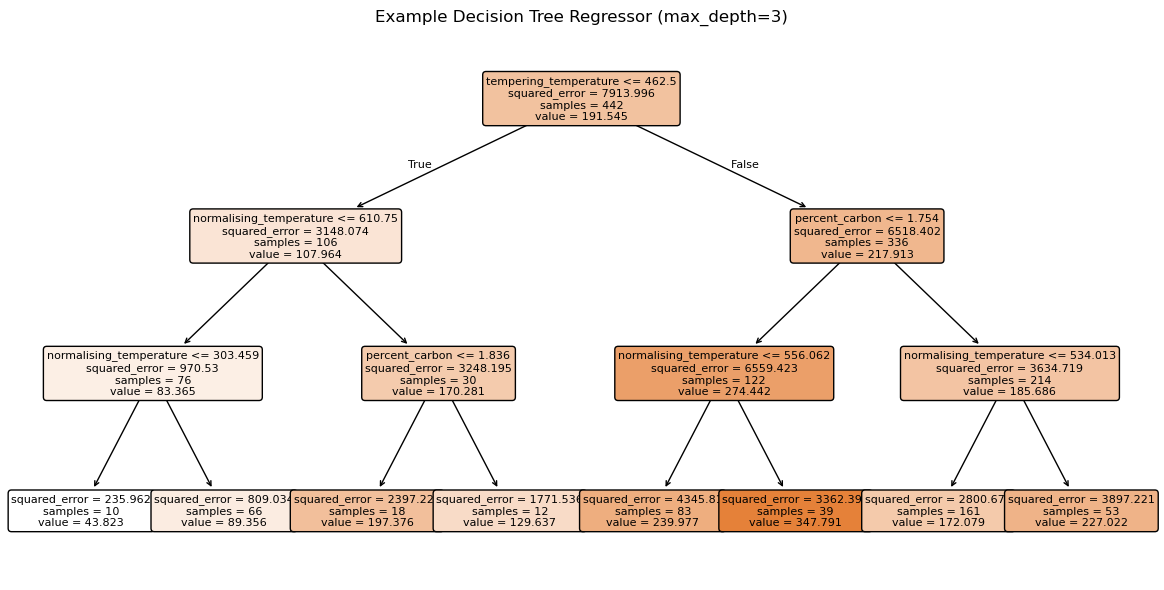

In [64]:
## Figures for Report
## Figure for Decision Tree

from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# small tree just for illustration
tree_fig = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_fig.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(
    tree_fig,
    filled=True,
    feature_names=X_train.columns,  # <- use your real feature names
    rounded=True,
    fontsize=8
)
plt.title("Example Decision Tree Regressor (max_depth=3)")
plt.tight_layout()
plt.savefig("../figures/decision_tree.png", dpi=300, bbox_inches="tight")
plt.show()


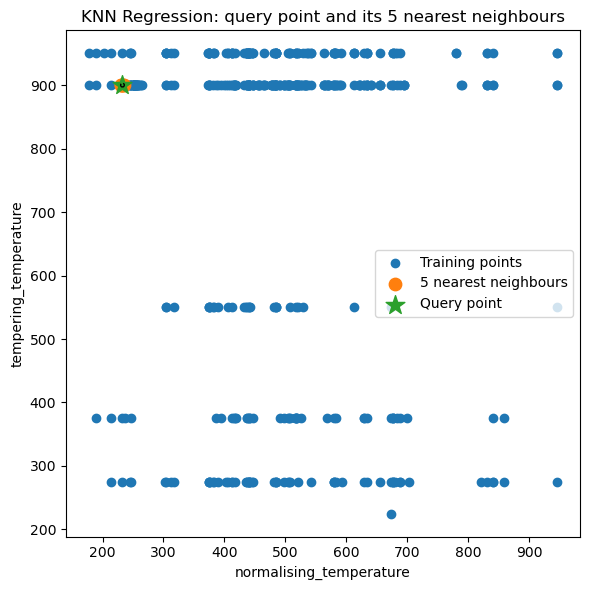

In [65]:
## Figure for KNN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances

# take first two features for plotting
X_plot = X_train.iloc[:, :2].values   # 2D numpy array
y_plot = y_train.values if hasattr(y_train, "values") else y_train

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_plot, y_plot)

# choose one query point (first training example)
query = X_plot[0].reshape(1, -1)

# find its 5 nearest neighbours
dists = pairwise_distances(query, X_plot)[0]
idx = np.argsort(dists)[:5]
radius = dists[idx[-1]]  # distance to the furthest of the 5 neighbours

plt.figure(figsize=(6, 6))
plt.scatter(X_plot[:, 0], X_plot[:, 1], label="Training points")
plt.scatter(
    X_plot[idx, 0],
    X_plot[idx, 1],
    s=80,
    label="5 nearest neighbours"
)
plt.scatter(
    query[0, 0],
    query[0, 1],
    marker="*",
    s=200,
    label="Query point"
)

# draw a dashed circle around the neighbour region
ax = plt.gca()
circle = plt.Circle((query[0, 0], query[0, 1]), radius, fill=False, linestyle="--")
ax.add_patch(circle)

plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.title("KNN Regression: query point and its 5 nearest neighbours")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/knn_neighbours.png", dpi=300, bbox_inches="tight")
plt.show()


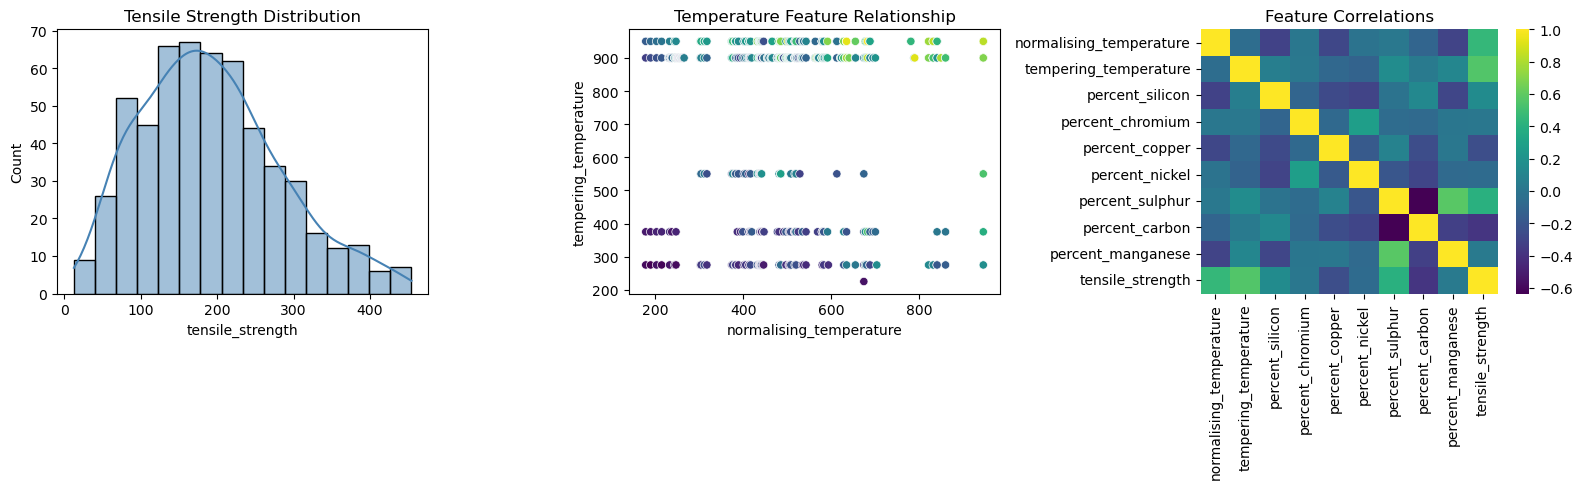

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/steel.csv")

plt.figure(figsize=(16, 5))

# --- Subplot 1: Target Distribution ---
plt.subplot(1, 3, 1)
sns.histplot(df['tensile_strength'], kde=True, color='steelblue')
plt.title("Tensile Strength Distribution")
plt.xlabel("tensile_strength")

# --- Subplot 2: Important Feature Relationship ---
plt.subplot(1, 3, 2)
sns.scatterplot(
    x=df['normalising_temperature'],
    y=df['tempering_temperature'],
    hue=df['tensile_strength'],
    palette='viridis',
    legend=False
)
plt.title("Temperature Feature Relationship")
plt.xlabel("normalising_temperature")
plt.ylabel("tempering_temperature")

# --- Subplot 3: Heatmap ---
plt.subplot(1, 3, 3)
sns.heatmap(df.corr(), annot=False, cmap="viridis")
plt.title("Feature Correlations")

plt.tight_layout()
plt.savefig("../figures/figure3_visualisation.png", dpi=300)
plt.show()


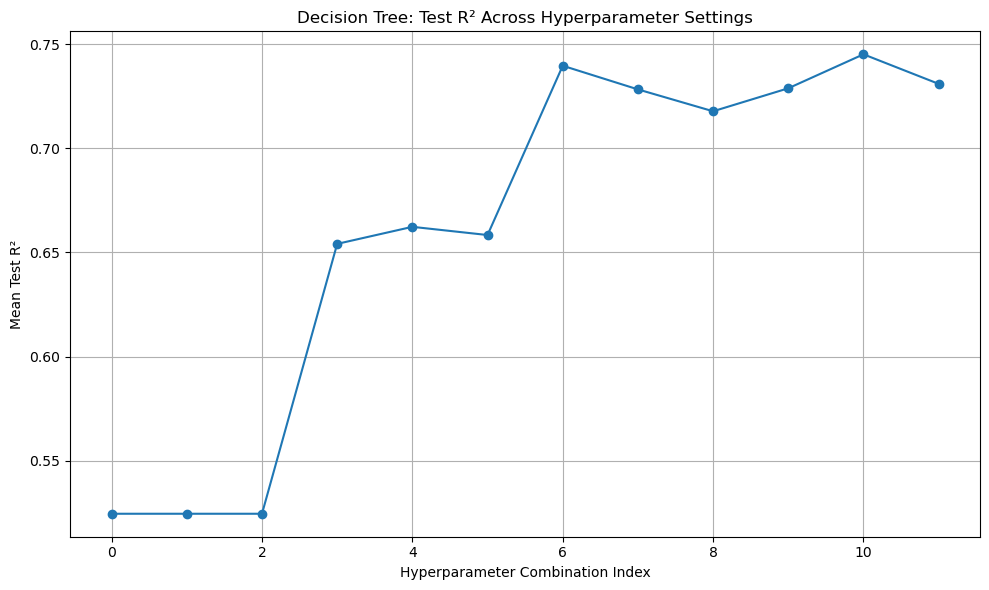

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv("../data/decision_tree_cv_results.csv")

plt.figure(figsize=(10,6))
plt.plot(results.index, results["mean_test_score"], marker='o')
plt.title("Decision Tree: Test R² Across Hyperparameter Settings")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean Test R²")
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/figure4b_dt_tuning.png", dpi=300)
plt.show()


In [70]:
# === NEW 5-ROW COMPARISON TABLE CODE ===
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, make_scorer

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {"rmse": make_scorer(rmse, greater_is_better=False), "r2": "r2"}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

models = [
    ("Baseline (max_depth=None, min_samples_split=2)",
     DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=42)),

    ("max_depth=3, min_samples_split=2",
     DecisionTreeRegressor(max_depth=3, min_samples_split=2, random_state=42)),

    ("max_depth=5, min_samples_split=2",
     DecisionTreeRegressor(max_depth=5, min_samples_split=2, random_state=42)),

    ("max_depth=10, min_samples_split=2",
     DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=42)),

    ("Best Model (max_depth=None, min_samples_split=5)",
     DecisionTreeRegressor(max_depth=None, min_samples_split=5, random_state=42)),
]

rows = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)

    rows.append([
        name,
        abs(cv_results["train_rmse"].mean()),
        abs(cv_results["test_rmse"].mean()),
        cv_results["train_r2"].mean(),
        cv_results["test_r2"].mean()
    ])

columns = ["Model", "Training RMSE", "Test RMSE", "Training R²", "Test R²"]
dt_comparison_table = pd.DataFrame(rows, columns=columns)

dt_comparison_table.to_csv("../data/decision_tree_comparison_table.csv", index=False)
dt_comparison_table


,Model,Training RMSE,Test RMSE,Training R²,Test R²
0,"Baseline (max_depth=None, min_samples_split=2)",1.765206e-15,40.694484,1.000000,0.778725
1,"max_depth=3, min_samples_split=2",5.574499e+01,61.096843,0.624557,0.518516
2,"max_depth=5, min_samples_split=2",3.790278e+01,47.560870,0.826002,0.700550
3,"max_depth=10, min_samples_split=2",1.247888e+01,38.973394,0.980725,0.795592
4,"Best Model (max_depth=None, min_samples_split=5)",1.042562e+01,38.721099,0.986802,0.797614
